In [1]:
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import fmax as fm
import numpy as np

In [2]:
def plot_posterior_predictive(fcast_model, label):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.posterior_predictive_samples
    index = fcast_model.train_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))

    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(index, medians, label="Median")
    axs.plot(index, fcast_model.train_data, color="red", label="Training")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

In [3]:
def plot_forecast(fcast_model, test_data, label, actual):
    """Simple plot of the posterior predictive of a forecast model.
    """

    sample_paths = fcast_model.forecast_samples
    index = fcast_model.master_with_fcast_index

    # Calculate the 1%, 10%, 50%, 90%, and 99% quantiles
    lower_bound_one = np.quantile(sample_paths, q=0.01, axis=0)
    lower_bound_ten = np.quantile(sample_paths, q=0.1, axis=0)
    medians = np.quantile(sample_paths, q=0.5, axis=0)
    upper_bound_ninety = np.quantile(sample_paths, q=0.9, axis=0)
    upper_bound_ninety_nine = np.quantile(sample_paths, q=0.99, axis=0)

    # Plot
    fig, axs = plt.subplots(figsize=(13,8))
    
    axs.fill_between(index, lower_bound_one, upper_bound_ninety_nine, alpha=0.4, label="99% CI", color="C0")
    axs.fill_between(index, lower_bound_ten, upper_bound_ninety, alpha=0.7, label="80% CI", color="C0")
    axs.plot(index, medians, label="Median")
    axs.plot(fcast_model.train_index, fcast_model.train_data, color="red", label="Training")
    axs.plot(fcast_model.fcast_index, test_data, color="black", label="Tryfos")
    axs.plot(fcast_model.fcast_index, actual, color="green", label="Actual")
    axs.legend()
    axs.set_xlabel("Period")
    axs.set_ylabel("Record")
    axs.set_title(label)

    fig.tight_layout()

    return fig

# Gaussian

WARNING (theano.tensor.opt): Optimization Warning: The Op erfcx does not provide a C implementation. As well as being potentially slow, this also disables loop fusion.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 31 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 31 seconds.


KeyboardInterrupt: 

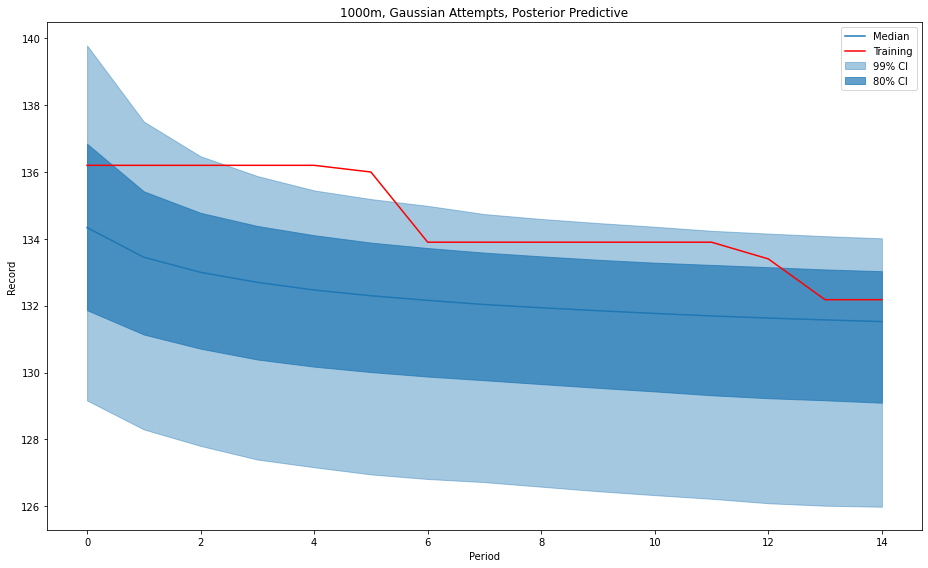

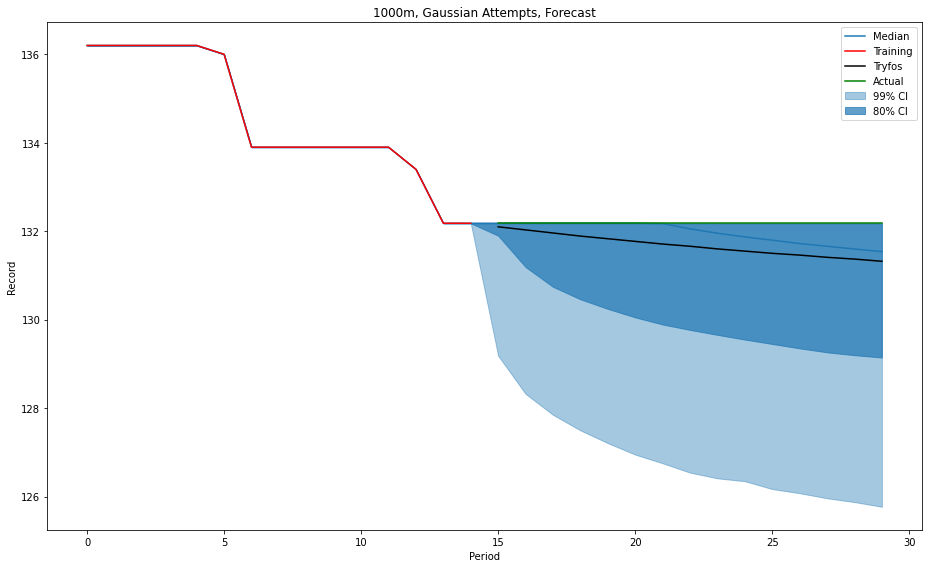

In [4]:
whiches = ["1000m", "1m", "5000m", "Marathon"]
for which in whiches:
  df = pd.read_csv("tryfos_data.csv")
  years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

  training_years = years[:15]
  training_records = records[:15]
  tryfos_years = years[15:]
  tryfos_fcast = records[15:]

  prior_parameters = {
            'mu' : {
              'mean' : training_records[0],
              'std' : 0.05*training_records[0],
            },
            'sigma' : {
              'lam' : 1
            }
          }

  model = fm.NewForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gaussian", kind="min", train='all', fcast_len=len(tryfos_fcast))
  model.fit(chains=1)
  model.posterior_predictive()
  model.forecast()
  
  actual_df = pd.read_csv("tryfos_actual.csv")
  _, actual_records = actual_df["Year"].values, actual_df[which].values

  fig = plot_posterior_predictive(model, f"{which}, Gaussian Attempts, Posterior Predictive")
  #fig.savefig(f"{which}_gaussian_attempts_post_pred.png")

  fig = plot_forecast(model, tryfos_fcast, f"{which}, Gaussian Attempts, Forecast", actual_records)
  #fig.savefig(f"{which}_gaussian_attempts_forecast.png")

# Gumbel

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 34 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 30 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 30 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [sigma, mu]


Sampling 1 chain for 5_000 tune and 20_000 draw iterations (5_000 + 20_000 draws total) took 28 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


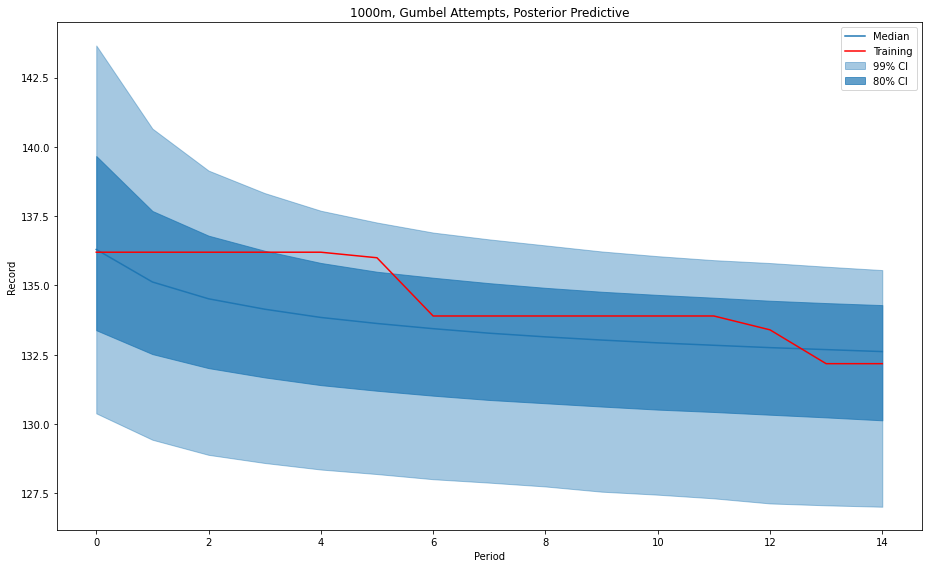

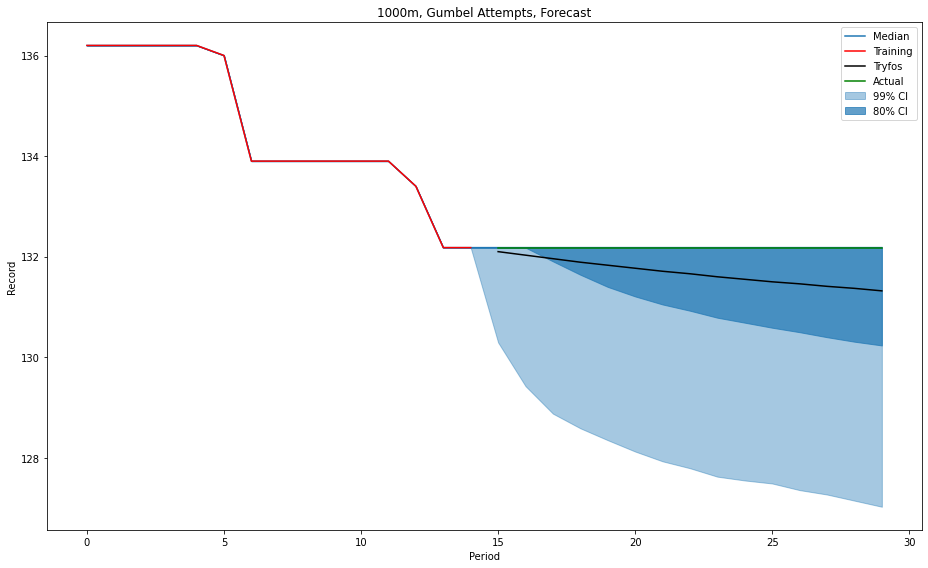

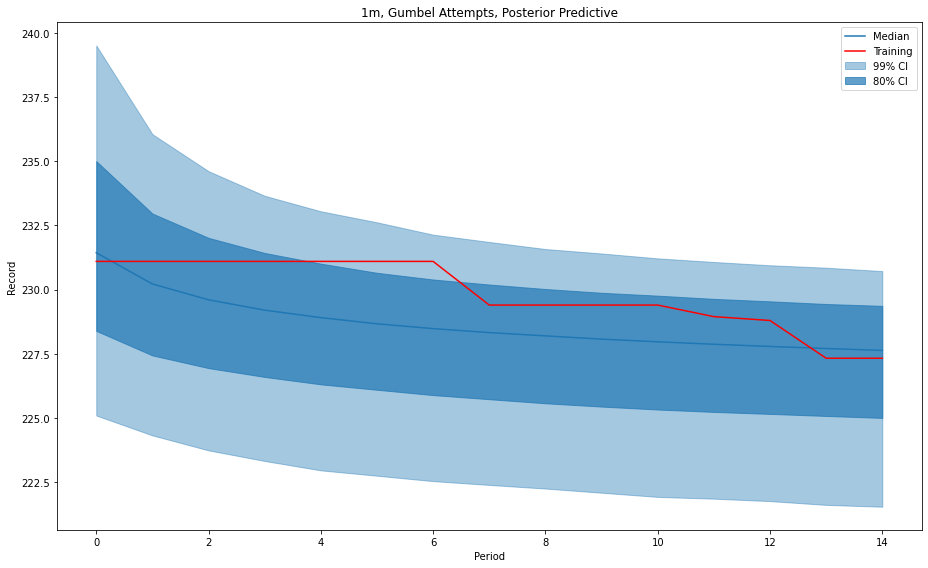

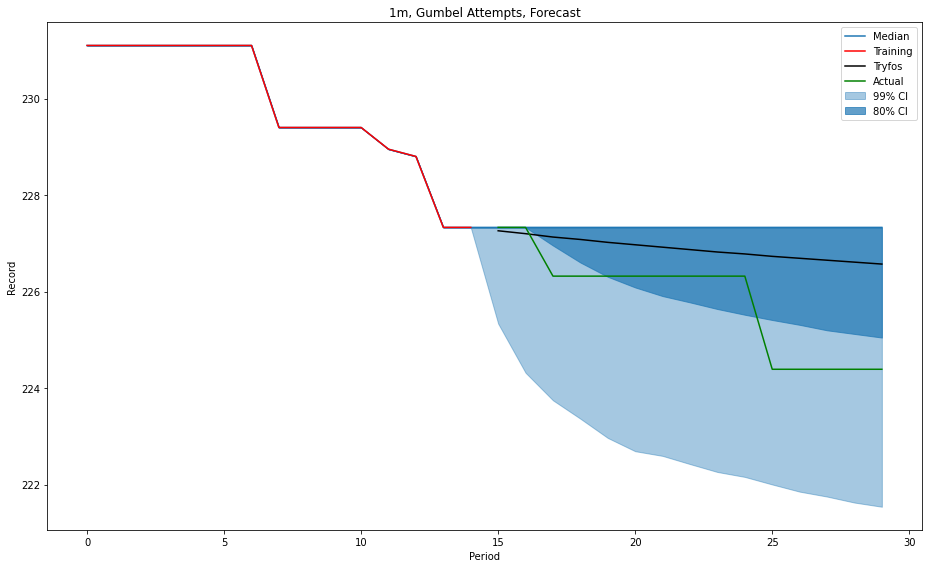

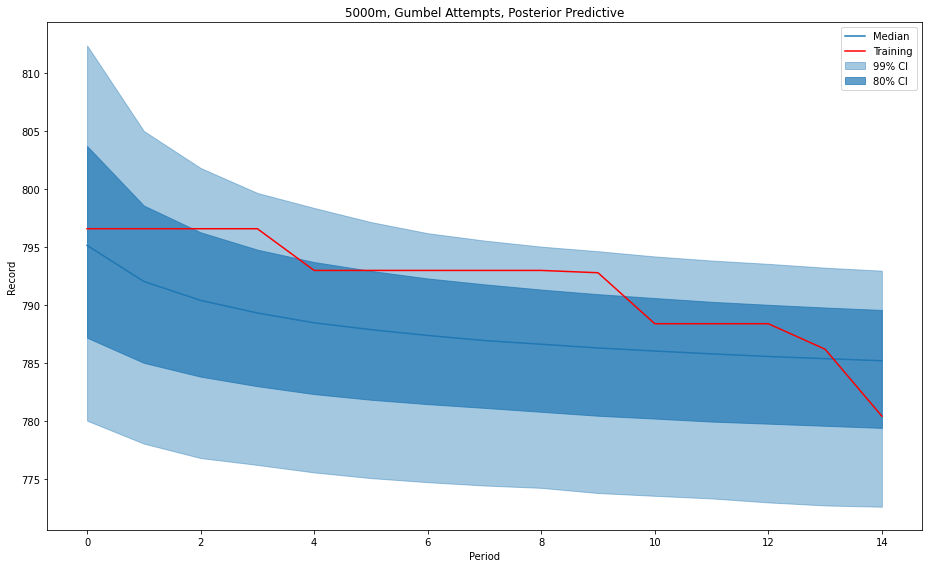

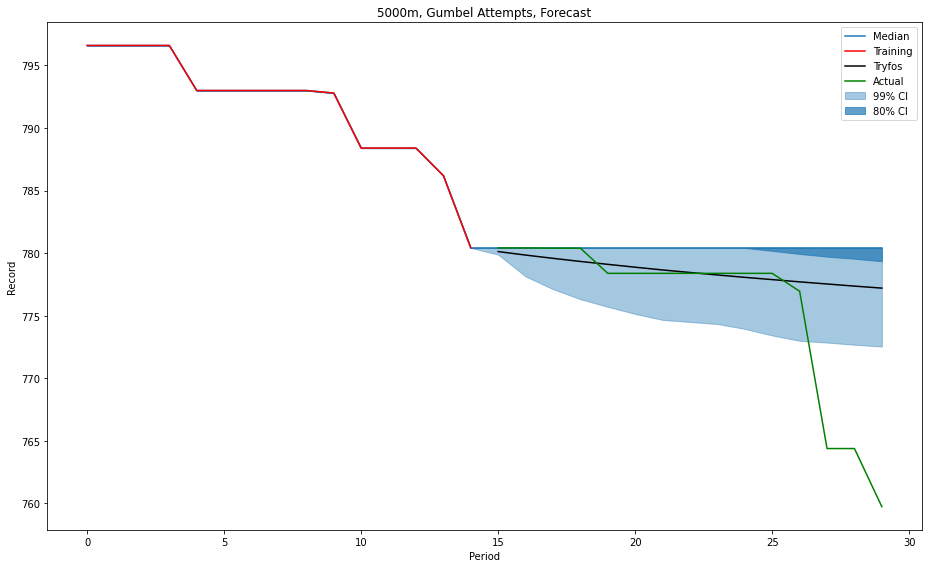

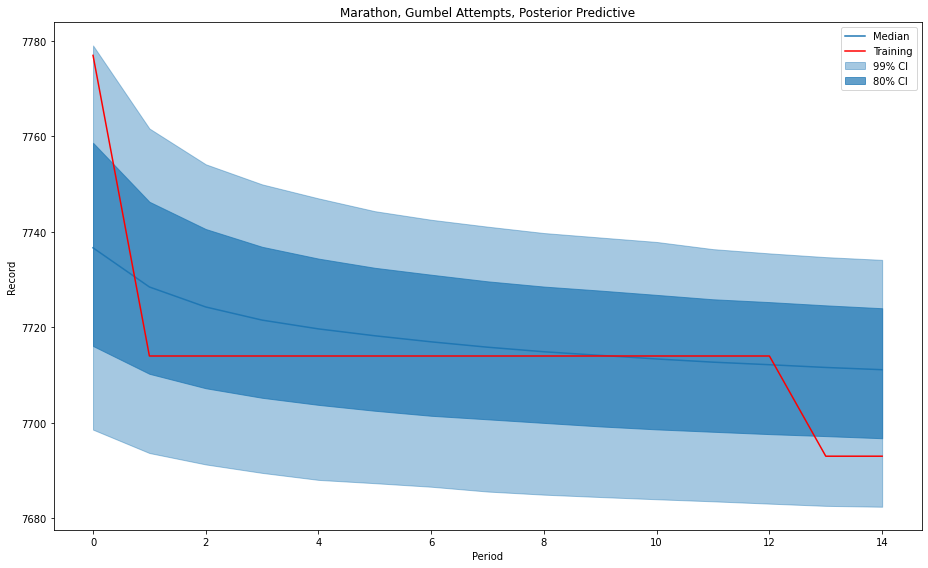

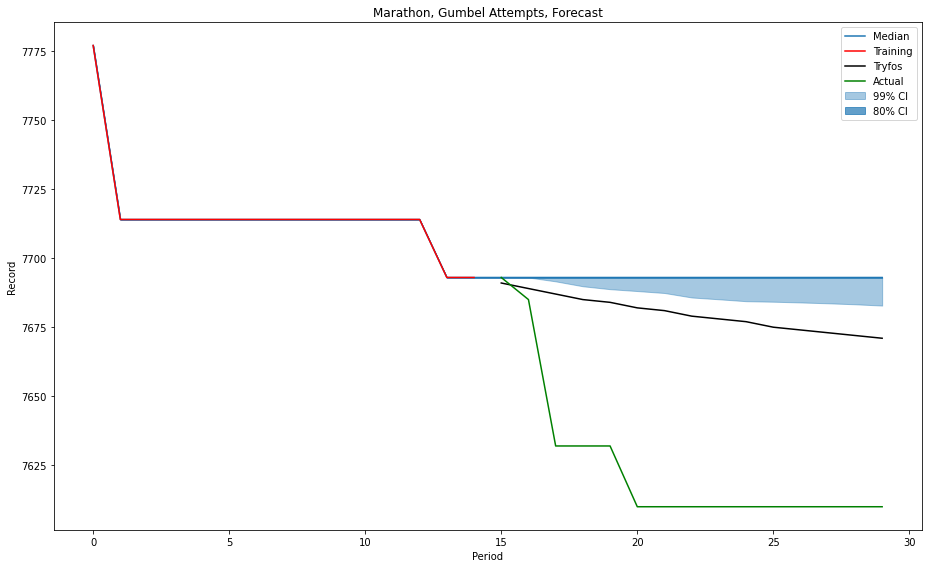

In [48]:
whiches = ["1000m", "1m", "5000m", "Marathon"]
#whiches = ["1000m"]
for which in whiches:
    try:
        df = pd.read_csv("tryfos_data.csv")
        years, records = df["Year"].values, df[which].values # Years 1983 and onward are just forecasts

        training_years = years[:15]
        training_records = records[:15]
        tryfos_years = years[15:]
        tryfos_fcast = records[15:]

        prior_parameters = {
                'mu' : {
                'mean' : training_records[0],
                'std' : 0.05*training_records[0],
                },
                'sigma' : {
                'lam' : 1
                }
            }

        model = fm.NewForecastModel(training_records, prior_parameters=prior_parameters, attempt_distribution="gumbel", kind="min", train='all', fcast_len=len(tryfos_fcast))
        model.fit(chains=1)
        model.posterior_predictive()
        model.forecast()
        
        actual_df = pd.read_csv("tryfos_actual.csv")
        _, actual_records = actual_df["Year"].values, actual_df[which].values

        fig = plot_posterior_predictive(model, f"{which}, Gumbel Attempts, Posterior Predictive")
        fig.savefig(f"{which}_gumbel_attempts_post_pred.png")

        fig = plot_forecast(model, tryfos_fcast, f"{which}, Gumbel Attempts, Forecast", actual_records)
        fig.savefig(f"{which}_gumbel_attempts_forecast.png")
    
    except:
        print(f"Error: failed on {which}")